In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.utils import shuffle
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Data/train_data.csv")
df.columns

Index(['Unnamed: 0', 'PreviousComps', 'Sex', 'Equipment', 'Age', 'Wilks',
       'Tested', 'Date', 'BodyweightKg', 'WilksRange', 'WilksRangeCat'],
      dtype='object')

# KMeans

In [3]:
cluster_assignments = KMeans(n_clusters=14,random_state=1).fit_predict(df[df.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date'])])



In [4]:

df['PredictedCat'] = cluster_assignments

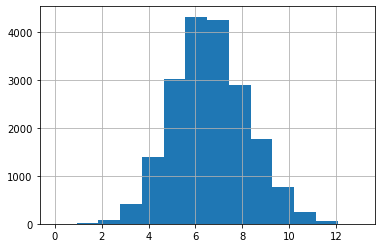

In [5]:
x=3
pd.to_numeric(df[df['PredictedCat']==x].WilksRangeCat).hist(bins=14)

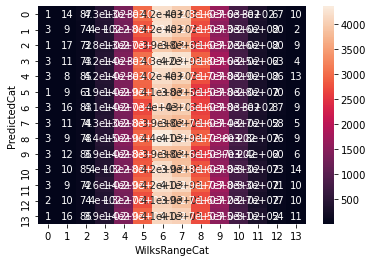

In [6]:
import seaborn as sns
tab = pd.crosstab(df['PredictedCat'],df['WilksRangeCat'])
sns.heatmap(tab,annot=True,annot_kws={"size": 10})
plt.show()

# DecisionTree

In [7]:
clf = tree.DecisionTreeClassifier()
X = df[df.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date', 'Equipment'])]
y = df.WilksRangeCat

# todo maybe cross validation?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = clf.fit(X_train, y_train)

In [8]:
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.22507200479597556


# KNN

In [9]:
classifier= KNeighborsClassifier(n_neighbors=2000, p=1 )
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2249677444579114


# RandomForest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
classifier = RandomForestClassifier(n_estimators = 200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25810949942005185


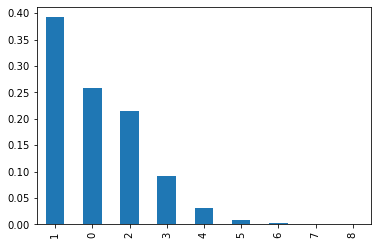

In [12]:
differences = []
for el1, el2 in zip(y_test,y_pred):
    differences.append([abs(el1-el2)])
dif_df = pd.DataFrame(differences, columns = ['Difference'])
dif_df['Difference'].value_counts(normalize=True).plot(kind="bar")
    

# Lasso

from sklearn.linear_model import Lasso

lassoM  = Lasso(alpha=0.001).fit(X_train,y_train)
y_pred = lassoM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Ridge

from sklearn.linear_model import Ridge

ridgeM = Ridge(alpha=0.1).fit(X_train,y_train)
y_pred = ridgeM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# SVM

In [15]:
from sklearn.svm import SVC

In [ ]:
svm_1 = SVC(kernel='linear', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

svm_poly_1 = SVC(kernel='poly', degree=2, gamma='auto', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_poly_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

svm_rbf_1 = SVC(kernel='rbf', gamma='auto', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_rbf_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
